<a href="https://colab.research.google.com/github/Kyamzzz/GISMA/blob/main/Image_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [3]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('Train data shape:', x_train.shape)
print('Test data shape:', x_test.shape)

170498071/170498071 [==============================] - 2s 0us/step
Train data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


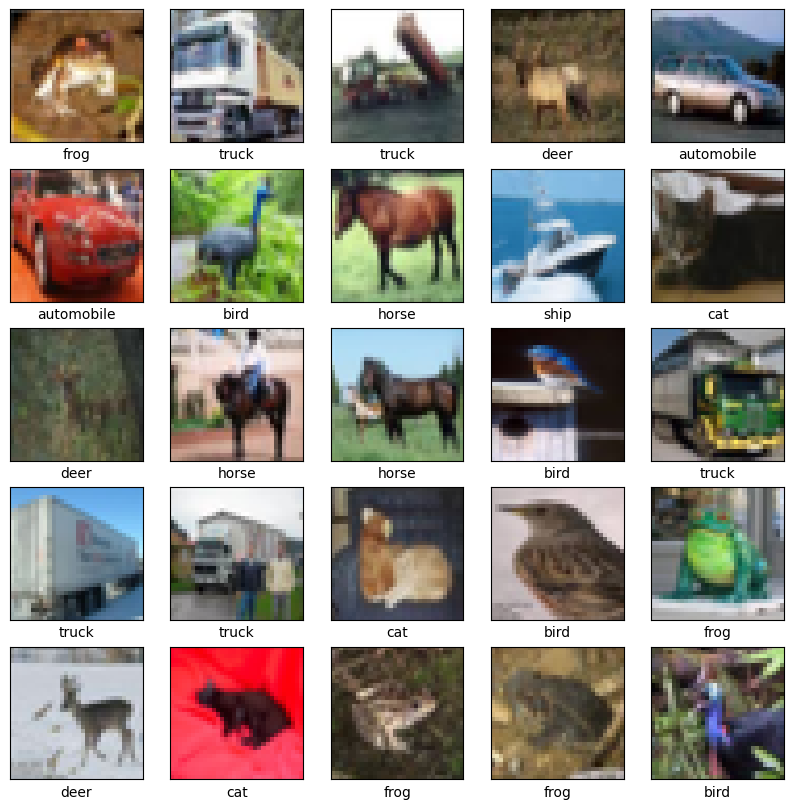

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [5]:
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [6]:
# Define the model architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Display the architecture of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 19s 5ms/step - loss: 1.5339 - accuracy: 0.4409 - val_loss: 1.2730 - val_accuracy: 0.5454
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1821 - accuracy: 0.5810 - val_loss: 1.1306 - val_accuracy: 0.6023
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0270 - accuracy: 0.6392 - val_loss: 1.0115 - val_accuracy: 0.6422
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9221 - accuracy: 0.6778 - val_loss: 0.9183 - val_accuracy: 0.6769
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8470 - accuracy: 0.7041 - val_loss: 0.8908 - val_accuracy: 0.6913
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7870 - accuracy: 0.7248 - val_loss: 0.8394 - val_accuracy: 0.7098
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7362 - accuracy: 0.7438 - val_loss: 0.8746 - val_accuracy

In [8]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 1s - loss: 0.8096 - accuracy: 0.7225 - 748ms/epoch - 2ms/step

Test accuracy: 0.7225000262260437


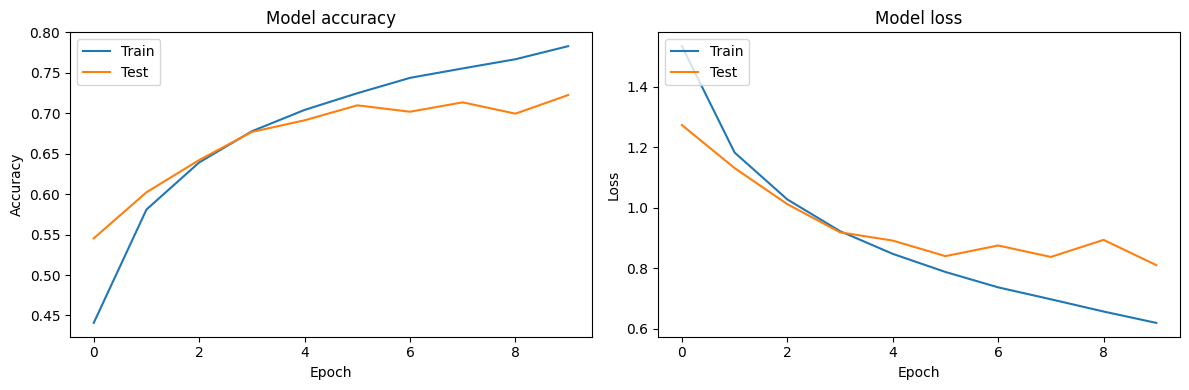

In [9]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()


In [10]:
# Define the model architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model with a different learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)


Epoch 1/10
1563/1563 [==============================] - 11s 5ms/step - loss: 1.5352 - accuracy: 0.4434 - val_loss: 1.2478 - val_accuracy: 0.5542
Epoch 2/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.1646 - accuracy: 0.5889 - val_loss: 1.0720 - val_accuracy: 0.6289
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0077 - accuracy: 0.6470 - val_loss: 0.9765 - val_accuracy: 0.6608
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9145 - accuracy: 0.6794 - val_loss: 0.9216 - val_accuracy: 0.6766
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8404 - accuracy: 0.7076 - val_loss: 0.9302 - val_accuracy: 0.6781
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7847 - accuracy: 0.7247 - val_loss: 0.9070 - val_accuracy: 0.6865
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7355 - accuracy: 0.7403 - val_loss: 0.8350 - val_accurac

In [11]:
# Define the model architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model with a different learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)


Epoch 1/10
1563/1563 [==============================] - 10s 5ms/step - loss: 1.9778 - accuracy: 0.2710 - val_loss: 1.8735 - val_accuracy: 0.3106
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8576 - accuracy: 0.3138 - val_loss: 1.8107 - val_accuracy: 0.3233
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7876 - accuracy: 0.3372 - val_loss: 1.8114 - val_accuracy: 0.3265
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7612 - accuracy: 0.3486 - val_loss: 1.7247 - val_accuracy: 0.3668
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.7481 - accuracy: 0.3567 - val_loss: 1.7304 - val_accuracy: 0.3568
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7367 - accuracy: 0.3628 - val_loss: 1.7152 - val_accuracy: 0.3776
Epoch 7/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.7236 - accuracy: 0.3661 - val_loss: 1.7194 - val_accuracy

In [12]:
# Define the model architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model with a different learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)


Epoch 1/10
1563/1563 [==============================] - 10s 5ms/step - loss: 1.7622 - accuracy: 0.3557 - val_loss: 1.5359 - val_accuracy: 0.4489
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4687 - accuracy: 0.4723 - val_loss: 1.4140 - val_accuracy: 0.4962
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3636 - accuracy: 0.5109 - val_loss: 1.3310 - val_accuracy: 0.5311
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2913 - accuracy: 0.5435 - val_loss: 1.2837 - val_accuracy: 0.5456
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2288 - accuracy: 0.5679 - val_loss: 1.2301 - val_accuracy: 0.5673
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1812 - accuracy: 0.5848 - val_loss: 1.1579 - val_accuracy: 0.5931
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1392 - accuracy: 0.6018 - val_loss: 1.1671 - val_accuracy

In [13]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models
from tensorflow.keras import layers

# Load the VGG16 architecture with pre-trained weights
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(32, 32, 3))

# Create a new model
model = models.Sequential()

# Add the pre-trained convolutional base
model.add(conv_base)

# Add new layers on top
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Freeze the convolutional base (we won't update the weights during training)
conv_base.trainable = False

# Compile and train the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)


58889256/58889256 [==============================] - 1s 0us/step
Epoch 1/10
1563/1563 [==============================] - 19s 11ms/step - loss: 1.3438 - accuracy: 0.5314 - val_loss: 1.2418 - val_accuracy: 0.5656
Epoch 2/10
1563/1563 [==============================] - 16s 11ms/step - loss: 1.1648 - accuracy: 0.5934 - val_loss: 1.1998 - val_accuracy: 0.5820
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0998 - accuracy: 0.6151 - val_loss: 1.1350 - val_accuracy: 0.6023
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0499 - accuracy: 0.6309 - val_loss: 1.1444 - val_accuracy: 0.5936
Epoch 5/10
1563/1563 [==============================] - 16s 11ms/step - loss: 1.0061 - accuracy: 0.6454 - val_loss: 1.1294 - val_accuracy: 0.6062
Epoch 6/10
1563/1563 [==============================] - 16s 11ms/step - loss: 0.9674 - accuracy: 0.6609 - val_loss: 1.1170 - val_accuracy: 0.6107
Epoch 7/10
1563/1563 [==============================] - 17s

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data generator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )

# Compute quantities required for featurewise normalization
datagen.fit(x_train)

# Fit the model on the batches generated by datagen.flow()
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    steps_per_epoch = len(x_train) / 64, epochs=10,
                    validation_data=(x_test, y_test))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)


Epoch 1/10
781/781 [==============================] - 34s 42ms/step - loss: 1.0598 - accuracy: 0.6265 - val_loss: 1.1173 - val_accuracy: 0.6156
Epoch 2/10
781/781 [==============================] - 34s 43ms/step - loss: 1.0398 - accuracy: 0.6299 - val_loss: 1.1125 - val_accuracy: 0.6137
Epoch 3/10
781/781 [==============================] - 35s 45ms/step - loss: 1.0249 - accuracy: 0.6367 - val_loss: 1.1036 - val_accuracy: 0.6213
Epoch 4/10
781/781 [==============================] - 34s 43ms/step - loss: 1.0176 - accuracy: 0.6415 - val_loss: 1.0970 - val_accuracy: 0.6267
Epoch 5/10
781/781 [==============================] - 35s 45ms/step - loss: 1.0076 - accuracy: 0.6433 - val_loss: 1.1082 - val_accuracy: 0.6208
Epoch 6/10
781/781 [==============================] - 33s 42ms/step - loss: 0.9993 - accuracy: 0.6469 - val_loss: 1.0953 - val_accuracy: 0.6219
Epoch 7/10
781/781 [==============================] - 34s 43ms/step - loss: 0.9923 - accuracy: 0.6480 - val_loss: 1.0952 - val_accuracy:

In [15]:
from tensorflow.keras import layers, models
from tensorflow.keras.regularizers import l2

# Define the model architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))

# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# Compile and train the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    steps_per_epoch = len(x_train) / 64, epochs=10,
                    validation_data=(x_test, y_test))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)


Epoch 1/10
781/781 [==============================] - 32s 39ms/step - loss: 2.0383 - accuracy: 0.2629 - val_loss: 1.7018 - val_accuracy: 0.4208
Epoch 2/10
781/781 [==============================] - 29s 37ms/step - loss: 1.7706 - accuracy: 0.3733 - val_loss: 1.5785 - val_accuracy: 0.4593
Epoch 3/10
781/781 [==============================] - 29s 37ms/step - loss: 1.7117 - accuracy: 0.4068 - val_loss: 1.5666 - val_accuracy: 0.4580
Epoch 4/10
781/781 [==============================] - 30s 38ms/step - loss: 1.6729 - accuracy: 0.4254 - val_loss: 1.5055 - val_accuracy: 0.4993
Epoch 5/10
781/781 [==============================] - 29s 37ms/step - loss: 1.6464 - accuracy: 0.4343 - val_loss: 1.4531 - val_accuracy: 0.5183
Epoch 6/10
781/781 [==============================] - 29s 37ms/step - loss: 1.6278 - accuracy: 0.4486 - val_loss: 1.4330 - val_accuracy: 0.5145
Epoch 7/10
781/781 [==============================] - 30s 38ms/step - loss: 1.6148 - accuracy: 0.4565 - val_loss: 1.3796 - val_accuracy:

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model with early stopping
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    steps_per_epoch=len(x_train) / 64, epochs=10,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping])

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)


Epoch 1/10
781/781 [==============================] - 29s 37ms/step - loss: 1.5630 - accuracy: 0.4875 - val_loss: 1.3158 - val_accuracy: 0.5730
Epoch 2/10
781/781 [==============================] - 30s 38ms/step - loss: 1.5516 - accuracy: 0.4931 - val_loss: 1.3811 - val_accuracy: 0.5446
Epoch 3/10
781/781 [==============================] - 30s 38ms/step - loss: 1.5352 - accuracy: 0.4982 - val_loss: 1.3519 - val_accuracy: 0.5552
Epoch 4/10
781/781 [==============================] - 30s 38ms/step - loss: 1.5386 - accuracy: 0.4982 - val_loss: 1.3164 - val_accuracy: 0.5765
313/313 - 1s - loss: 1.3164 - accuracy: 0.5765 - 746ms/epoch - 2ms/step

Test accuracy: 0.5764999985694885
